In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import camera_callibration
import color_transformations as ct
import perspective_transform as pt
import find_lanes as fl
import os

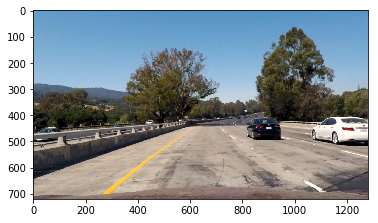

In [3]:
#find object points and image points using findcorners of cv2
image = cv2.imread("./test_images/test1.jpg")
object_points, img_points, img_shape = camera_callibration.findCorners(9, 6)
ret, mtx,dist,rvecs,tvecs = camera_callibration.findCalibrationParams(img_shape, object_points, img_points)
undistorted_img = camera_callibration.undistort_image(image, mtx, dist)

plt.imshow(cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))

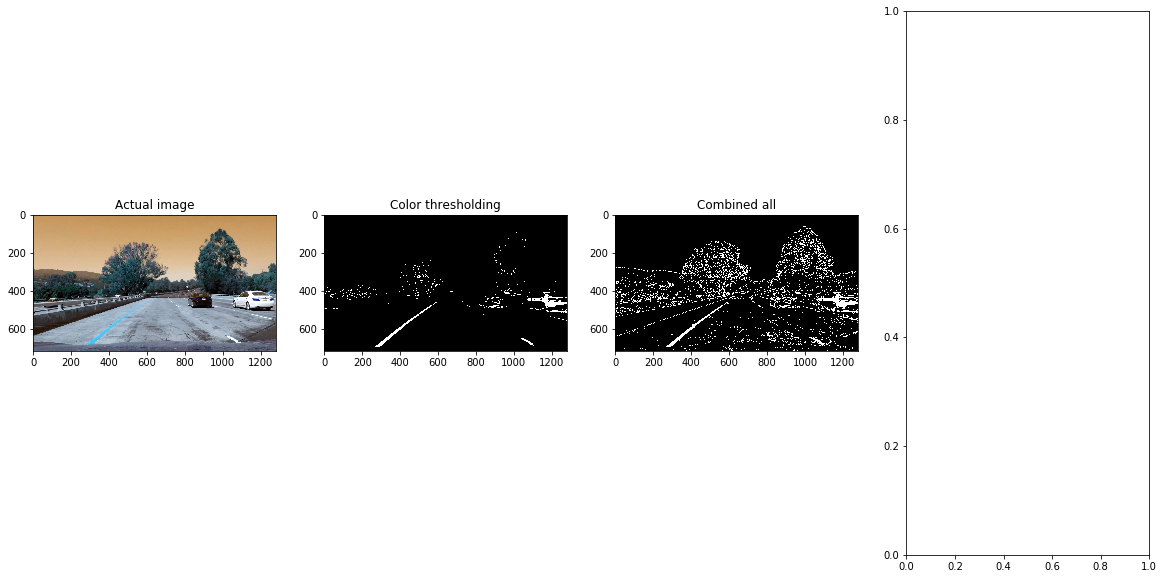

In [4]:
sobelx = ct.abs_sobel(undistorted_img)
sobely = ct.abs_sobel(undistorted_img, orient='y')

sobel_x_binary = ct.abs_sobel_threshold(undistorted_img, sobelx, thresh=(20, 100))
sobel_y_binary = ct.abs_sobel_threshold(undistorted_img, sobely, thresh=(20, 100))

mag_threshold_binary = ct.get_magnitude_threshold(sobelx, sobely, thresh=(20, 100))
dir_threshold_binary = ct.get_dir_threshold(sobelx, sobely, thresh=(0.7, 1.4))
hls_threshold_binary = ct.hls_select(undistorted_img, thresh=(150, 255))

combined_binary = ct.combined_color_transforms(sobel_x_binary, sobel_y_binary, mag_threshold_binary, dir_threshold_binary, hls_threshold_binary)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
ax1.set_title('Actual image')
ax1.imshow(image)
ax2.set_title('Color thresholding')
ax2.imshow(hls_threshold_binary, cmap='gray')
ax3.set_title('Combined all')
ax3.imshow(combined_binary, cmap='gray')
plt.show()

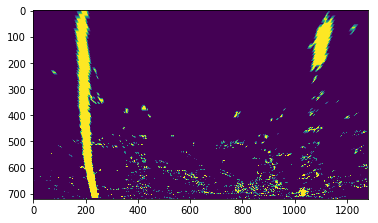

In [5]:
warped_img, M = pt.warp_image(combined_binary)
plt.imshow(warped_img)

In [6]:
leftx, lefty, rightx, righty, out_img = fl.find_lane_pixels(warped_img)

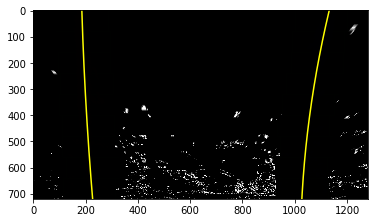

In [7]:
img = fl.fit_polynomial(warped_img)
plt.imshow(img)